In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\admin\\python'

In [3]:
data=pd.read_csv('Advertising.csv')

In [4]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
data.shape

(200, 5)

In [6]:
data.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe() #sd =0 its constant and drop the row

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: ylabel='Density'>

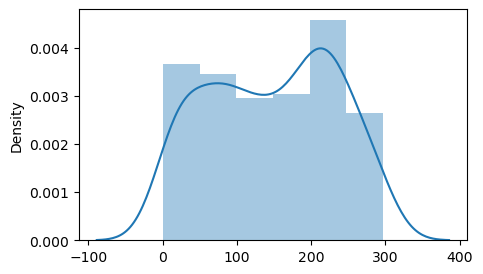

In [11]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['TV'])

<Axes: ylabel='Density'>

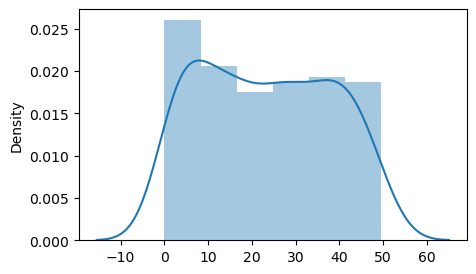

In [12]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Radio'])

<Axes: ylabel='Density'>

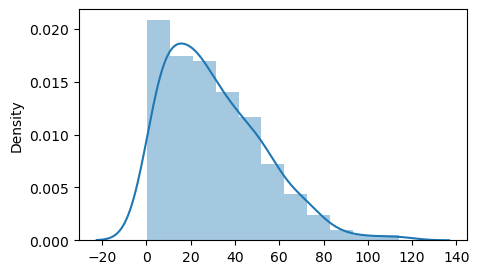

In [13]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Newspaper'])

<Axes: ylabel='Density'>

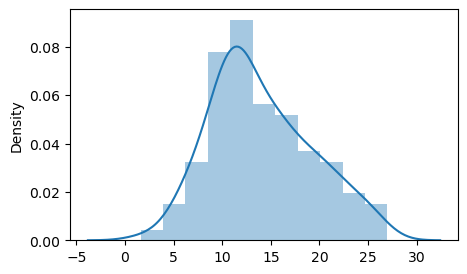

In [14]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Sales'])

In [15]:
# TV vs Sales
# Radio vs Sales
# Newspaper vs Sales

# num vs num

<Axes: xlabel='TV', ylabel='Sales'>

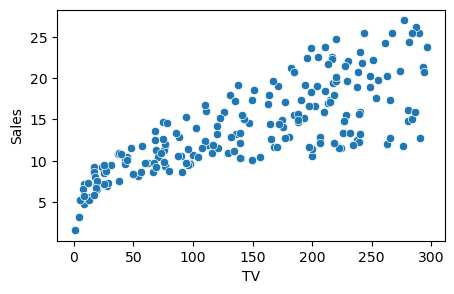

In [16]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=data, x='TV', y = 'Sales') #+ve relation

<Axes: xlabel='Radio', ylabel='Sales'>

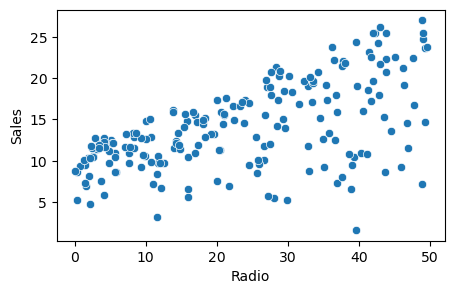

In [17]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=data, x='Radio', y = 'Sales') #+ve relation

<Axes: xlabel='Newspaper', ylabel='Sales'>

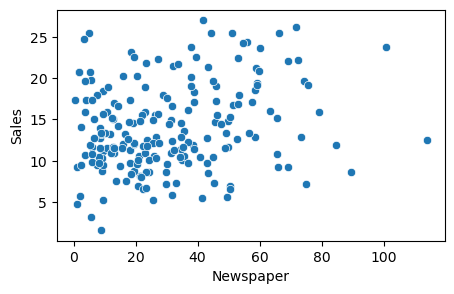

In [18]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=data, x='Newspaper', y = 'Sales') #+ve relation

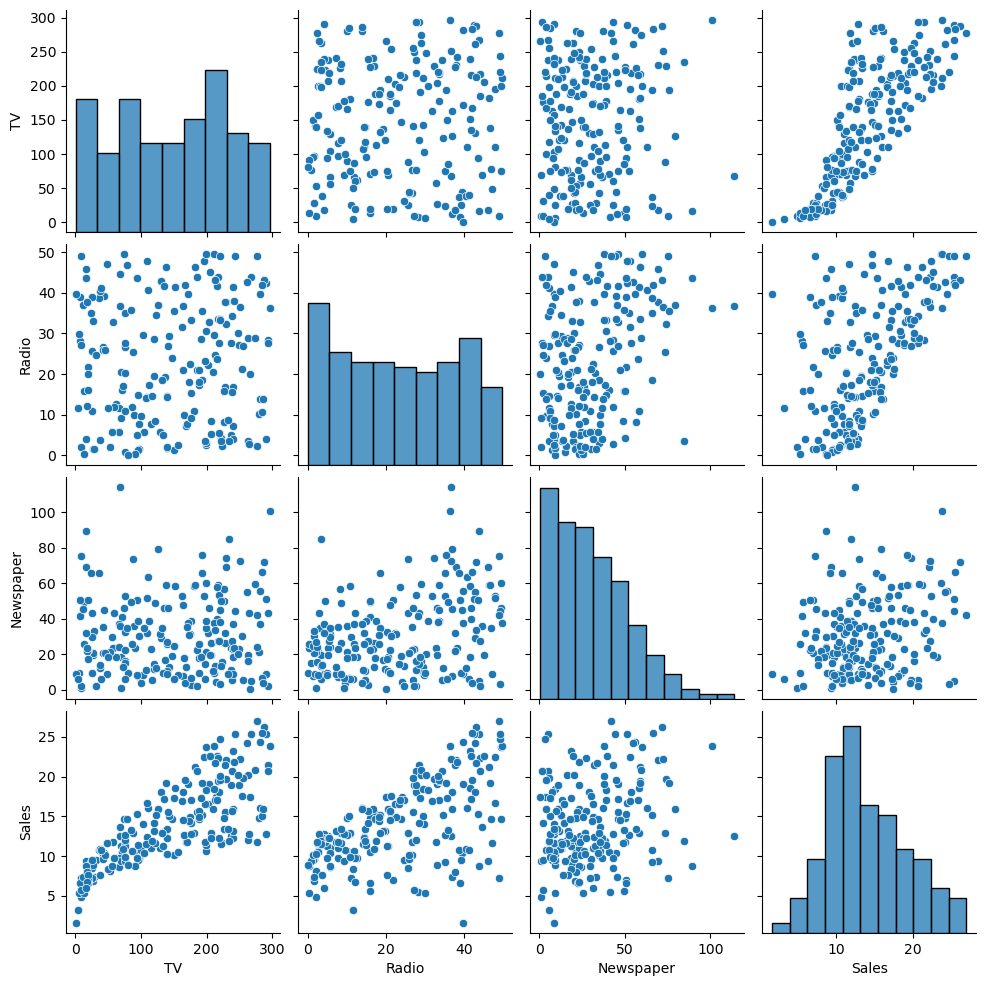

In [19]:
#pair plot
sns.pairplot(data)

In [20]:
data.duplicated().sum() #checking for the duplicate values

0

<Axes: xlabel='Newspaper'>

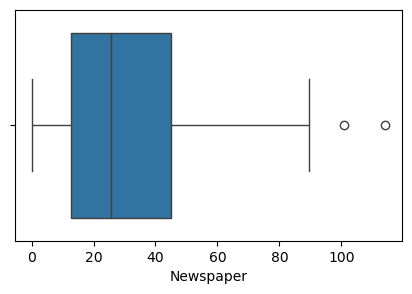

In [21]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data['Newspaper'])

<Axes: ylabel='Density'>

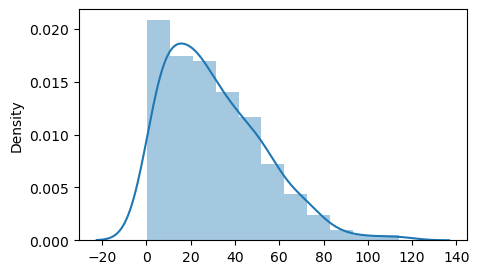

In [22]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Newspaper'])

In [23]:
q1=data['Newspaper'].quantile(0.25)
q3=data['Newspaper'].quantile(0.75)
iqr=q3-q1


In [24]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower)
print(upper)

-35.775000000000006
93.625


In [25]:
data.loc[data['Newspaper']<lower]

,TV,Radio,Newspaper,Sales


In [26]:
data.loc[data['Newspaper']>upper]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [27]:
data.loc[data['Newspaper']>upper,'Newspaper']=data['Newspaper'].median()

<Axes: ylabel='Density'>

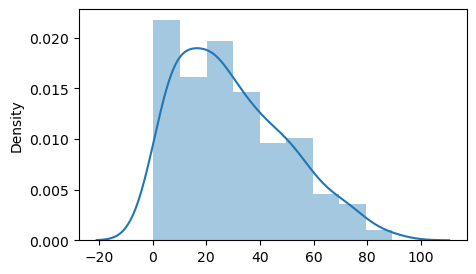

In [28]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Newspaper'])

## Feature engineering / Feature selection
We are going to select the important features from the data, for the model to get trained

drop the irrelevant columns

heatmap and check the co relation values

In [28]:
df = data.drop(columns=['Sales'])

<Axes: >

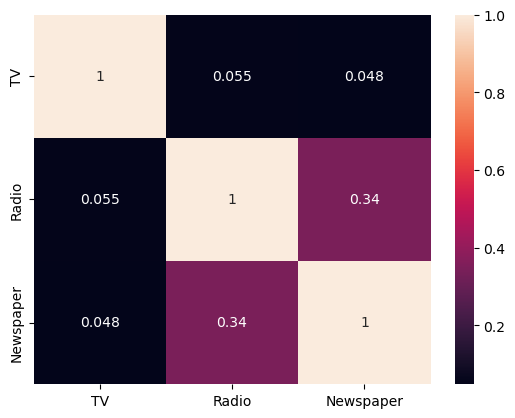

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
x = data.drop('Sales',axis=1)
y = data['Sales']

In [31]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [32]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [33]:
# divide the x and y into training data and testing data
# 100 % data will be there

# training  maximumn data will be sent for model to train, 70%, 75%, 80%
# testing  minim data that is 20%, 25%,30 % will be sent for testing , new record for the model
        # it is a total unseen record for the model
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.25, random_state = 10)

In [34]:
x.shape

(200, 3)

In [35]:
x_train.shape

(150, 3)

In [36]:
x_test.shape

(50, 3)

In [37]:
# import the algorithm
from sklearn.linear_model import LinearRegression

#initialise it
model = LinearRegression()

#train the model
model.fit(x_train, y_train)

LinearRegression()

In [38]:
# we trained the model
# we need to test the model for the performance
# y_pred
# for tetsing the model, we need to send the model with unseen records, x_test

In [39]:
y_pred = model.predict(x_test)

In [40]:
y_pred

array([18.18228868, 13.08343207, 18.00780342, 23.54104609, 20.69769158,
       14.34238441, 14.94970273, 21.37744063, 21.18659219, 12.88278434,
       23.91291344,  7.32138819, 12.37136014, 19.22319771, 19.30687075,
       13.58033499, 19.60304176,  9.46890591, 21.11729622, 20.9415573 ,
       15.56452028, 11.15984732, 22.76256695, 15.87514893, 17.33664344,
        8.30243573, 12.10708631, 12.85020339, 21.73845371,  8.14125261,
       12.54891901, 20.44157997,  4.86247124,  4.84727195, 16.66223933,
       15.65916632,  6.84741109, 17.66183472,  9.09067187, 13.58523963,
       13.12359289, 12.37034135, 15.2286349 , 10.26101712, 22.0035955 ,
       10.9547349 , 14.77975983, 15.02897856,  9.08818726, 12.10263676])

In [41]:
y_test

59     18.4
5       7.2
20     18.0
198    25.5
52     22.6
19     14.6
162    14.9
55     23.7
69     22.3
2       9.3
98     25.4
10      8.6
75      8.7
142    20.1
124    19.7
63     14.0
109    19.8
78      5.3
111    21.8
185    22.6
154    15.6
130     1.6
61     24.2
87     16.0
102    14.8
121     7.0
136     9.5
1      10.4
47     23.2
172     7.6
159    12.9
39     21.5
76      6.9
91      7.3
35     12.8
178    11.8
127     8.8
169    15.0
46     10.6
174    11.5
190    10.8
7      13.2
26     15.0
138     9.6
58     23.8
72      8.8
103    14.7
199    13.4
56      5.5
116    12.2
Name: Sales, dtype: float64

In [42]:
# slopes # 3 slope values are given?

model.coef_

array([ 0.04282008,  0.19482051, -0.00348125])

In [43]:
#intercept
model.intercept_

3.4452679767879957

In [44]:
#user defined values for the prediction
# TV 100 , Radio 70 Newspaper = 20
model.predict([[100,70,20]])

array([21.29508685])

In [45]:
# Erros / loss functions
# Error = Actual - predicted value
# MSE
# MAE
# RMSE
# takes 2 parameters y_test, y_pred

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
mse = mean_squared_error(y_test,y_pred)
mse

6.1257553926550425

In [48]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.7881042063700547

In [49]:
rmse = np.sqrt(mse)
rmse

2.4750263418103335

In [50]:
r2_score(y_test,y_pred)

0.8367862338463596

In [51]:
# 84% is the r2 score
# this signifies, the over all perfomance of the model is good
# 87% of the records are predicted correctly
# 16% of data is predicted wrong